TFD+Representation dans le domain frequentiel 

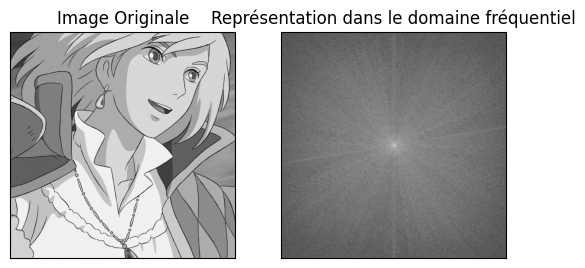

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = r"C:\Users\DELL\Desktop\myimage.jpg"  
image = Image.open(image_path).convert('L')
f = np.fft.fft2(image)  
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 20*np.log1p(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Représentation dans le domaine fréquentiel'), plt.xticks([]), plt.yticks([])
plt.show()

# Save the image of the frequency domain representation
plt.savefig(r"C:\Users\DELL\Downloads\frequency_domain_representation.jpg")

plt.show()

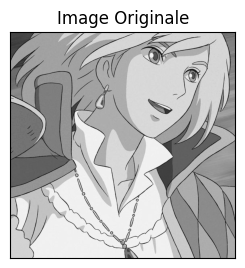

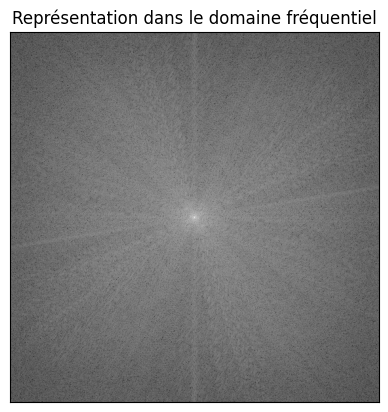

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = r"C:\Users\DELL\Desktop\myimage.jpg"  
image = Image.open(image_path).convert('L')
f = np.fft.fft2(image)  
fshift = np.fft.fftshift(f) 
magnitude_spectrum = 20*np.log1p(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.figure()  
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Représentation dans le domaine fréquentiel'), plt.xticks([]), plt.yticks([])


plt.savefig(r"C:\Users\DELL\Downloads\frequency_domain_representation.jpg")

plt.show()

filtre pass-bas expo


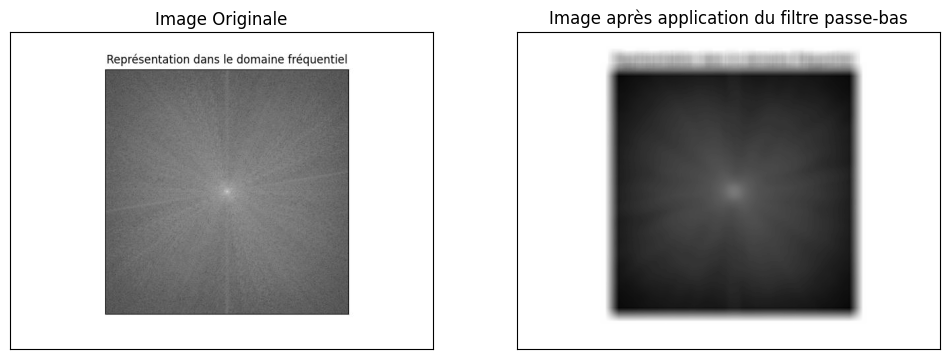

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


image_path = r"C:\Users\DELL\Downloads\frequency_domain_representation.jpg"
image = Image.open(image_path).convert('L')
image = np.array(image)




#traitement



tau = 30          



kernel_size = 21  
kernel = np.fromfunction(lambda x, y: np.exp(-np.sqrt((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / tau), (kernel_size, kernel_size))
kernel /= np.sum(kernel)  
filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
# Save the filtered image
filtered_image_pil = Image.fromarray(filtered_image)
filtered_image_pil.save(r"C:\Users\DELL\Downloads\filtered_image.jpg")




#affichage
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Image après application du filtre passe-bas'), plt.xticks([]), plt.yticks([])

plt.show()


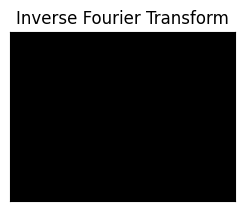

In [15]:
# Assuming 'filtered_image' is the result of some filtering process in the frequency domain
image_filtree_inverse = np.fft.ifft2(filtered_image)
image_filtree_inverse = np.abs(image_filtree_inverse)

# Normalize the image to the range [0, 255]
image_filtree_inverse = (image_filtree_inverse - np.min(image_filtree_inverse)) / (np.max(image_filtree_inverse) - np.min(image_filtree_inverse))
image_filtree_inverse = (image_filtree_inverse * 255).astype(np.uint8)

plt.subplot(122), plt.imshow(image_filtree_inverse, cmap='gray')
plt.title('Inverse Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3612\535583068.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(image_path, pilmode='L')


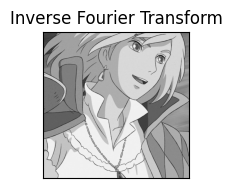

In [14]:
import imageio
from PIL import Image  

def inverse_fourier(image_path, sigma):
    original_image = imageio.imread(image_path, pilmode='L')
    fourier_transform = np.fft.fft2(original_image)
    fourier_transform_shifted = np.fft.fftshift(fourier_transform)
    magnitude_spectrum = np.log(1 + np.abs(fourier_transform_shifted))

    magnitude_spectrum_inverse = np.exp(magnitude_spectrum) - 1
    fourier_transform_unshifted = np.fft.ifftshift(fourier_transform_shifted)
    inverse_transformed_image = np.fft.ifft2(fourier_transform_unshifted).real

    return original_image, magnitude_spectrum_inverse, inverse_transformed_image

image_path = r"C:\Users\DELL\Desktop\myimage.jpg"  
image = Image.open(image_path).convert('L')
sigma_value = 25
original_image, magnitude_spectrum_inverse, inverse_transformed_image = inverse_fourier(image_path, sigma_value)

plt.subplot(133), plt.imshow(inverse_transformed_image, cmap='gray')
plt.title('Inverse Fourier Transform'), plt.xticks([]), plt.yticks([])

plt.show()
